# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [2]:
csv = pd.read_csv('base_credit_1.csv')
df_credit = pd.DataFrame(csv)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   sexo                               16650 non-null  int64
 1   posse_de_veiculo                   16650 non-null  int64
 2   posse_de_imovel                    16650 non-null  int64
 3   idade                              16650 non-null  int64
 4   tempo_emprego                      16650 non-null  int64
 5   possui_celular                     16650 non-null  int64
 6   possui_fone_comercial              16650 non-null  int64
 7   possui_fone                        16650 non-null  int64
 8   possui_email                       16650 non-null  int64
 9   mau                                16650 non-null  int64
 10  qtd_filhos_0                       16650 non-null  int64
 11  qtd_filhos_1                       16650 non-null  int64
 12  qtd_filhos_2More  

Dividindo a base em 30% em teste.

In [3]:
X = df_credit.drop('mau', axis=1)
y = df_credit['mau']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [4]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [5]:
clf = clf.fit(X_train,y_train)

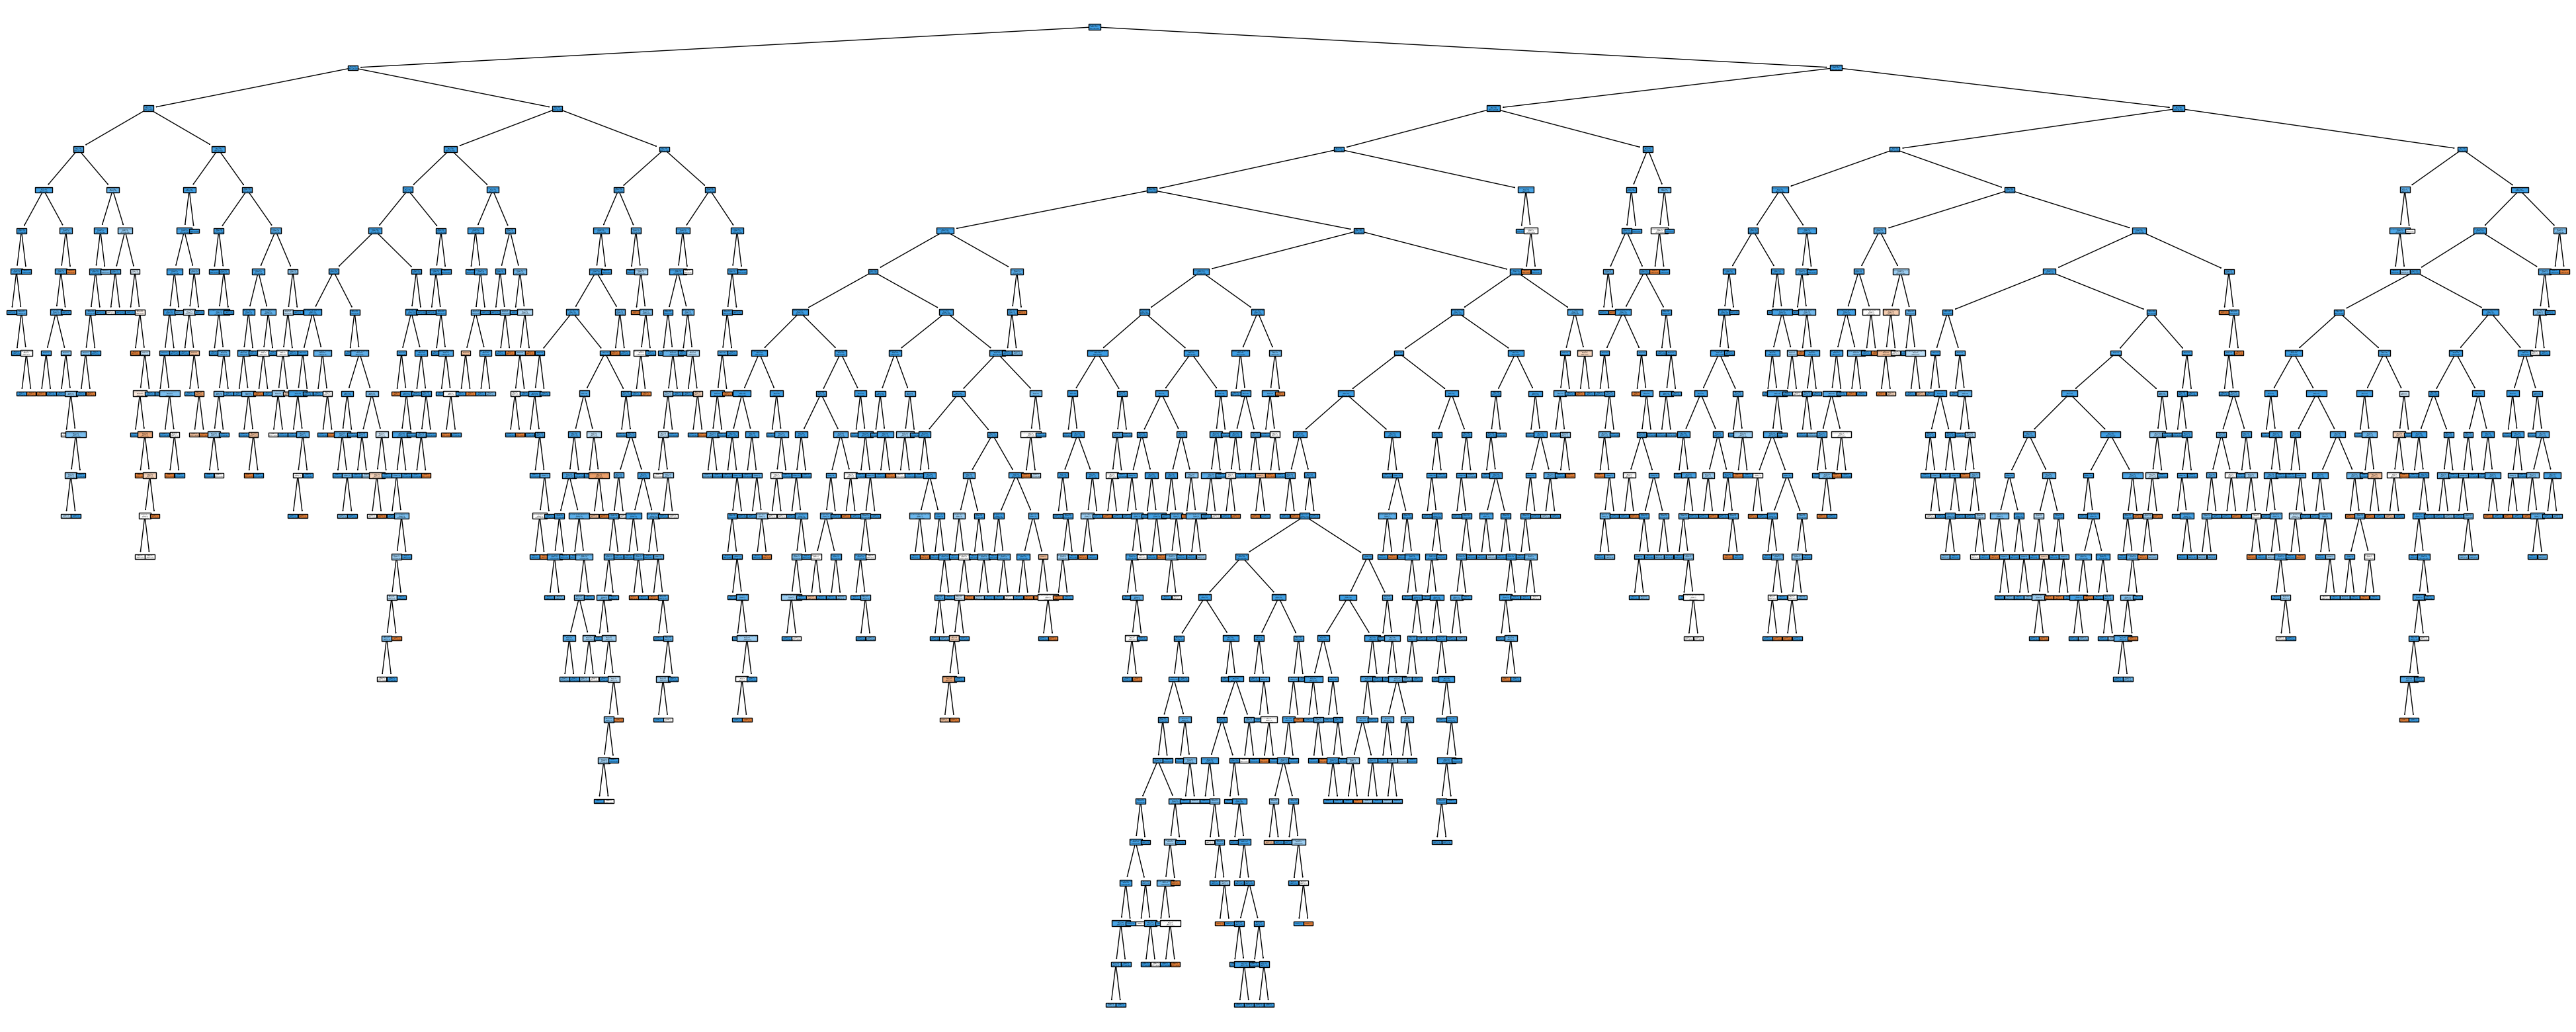

In [25]:
plt.figure(figsize=(50,20))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X_train.columns);
plt.show()
          

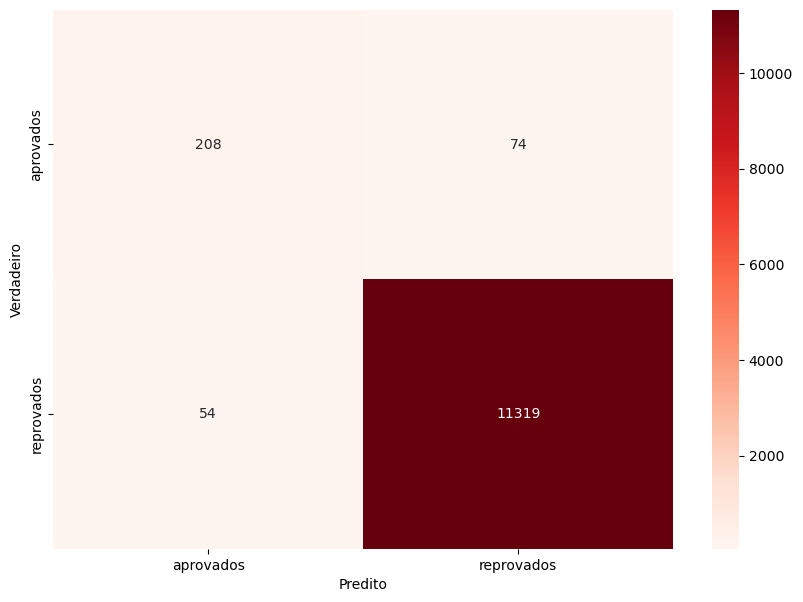

In [7]:
y_train_pred = clf.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [8]:
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

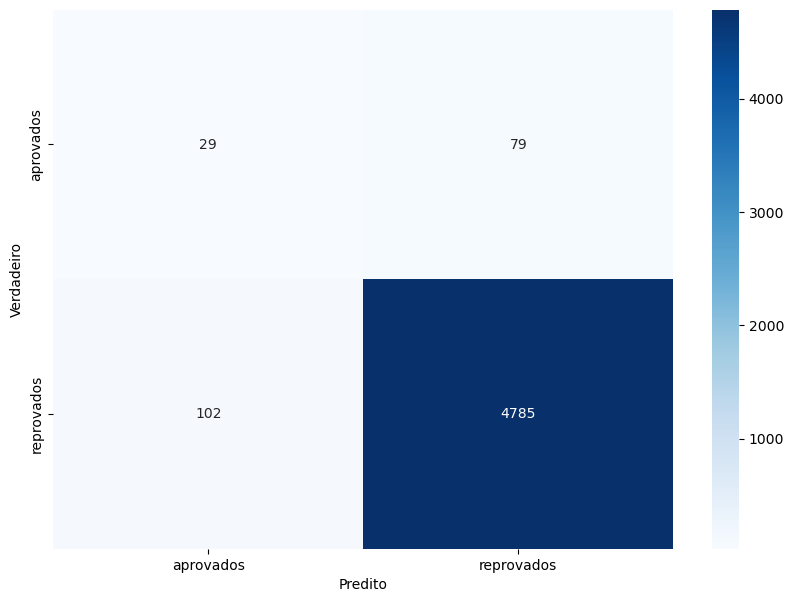

In [9]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.96


In [17]:
clf_pruning = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, random_state=123)

In [18]:
clf_pruning = clf_pruning.fit(X_train,y_train)
clf_pruning

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=123)

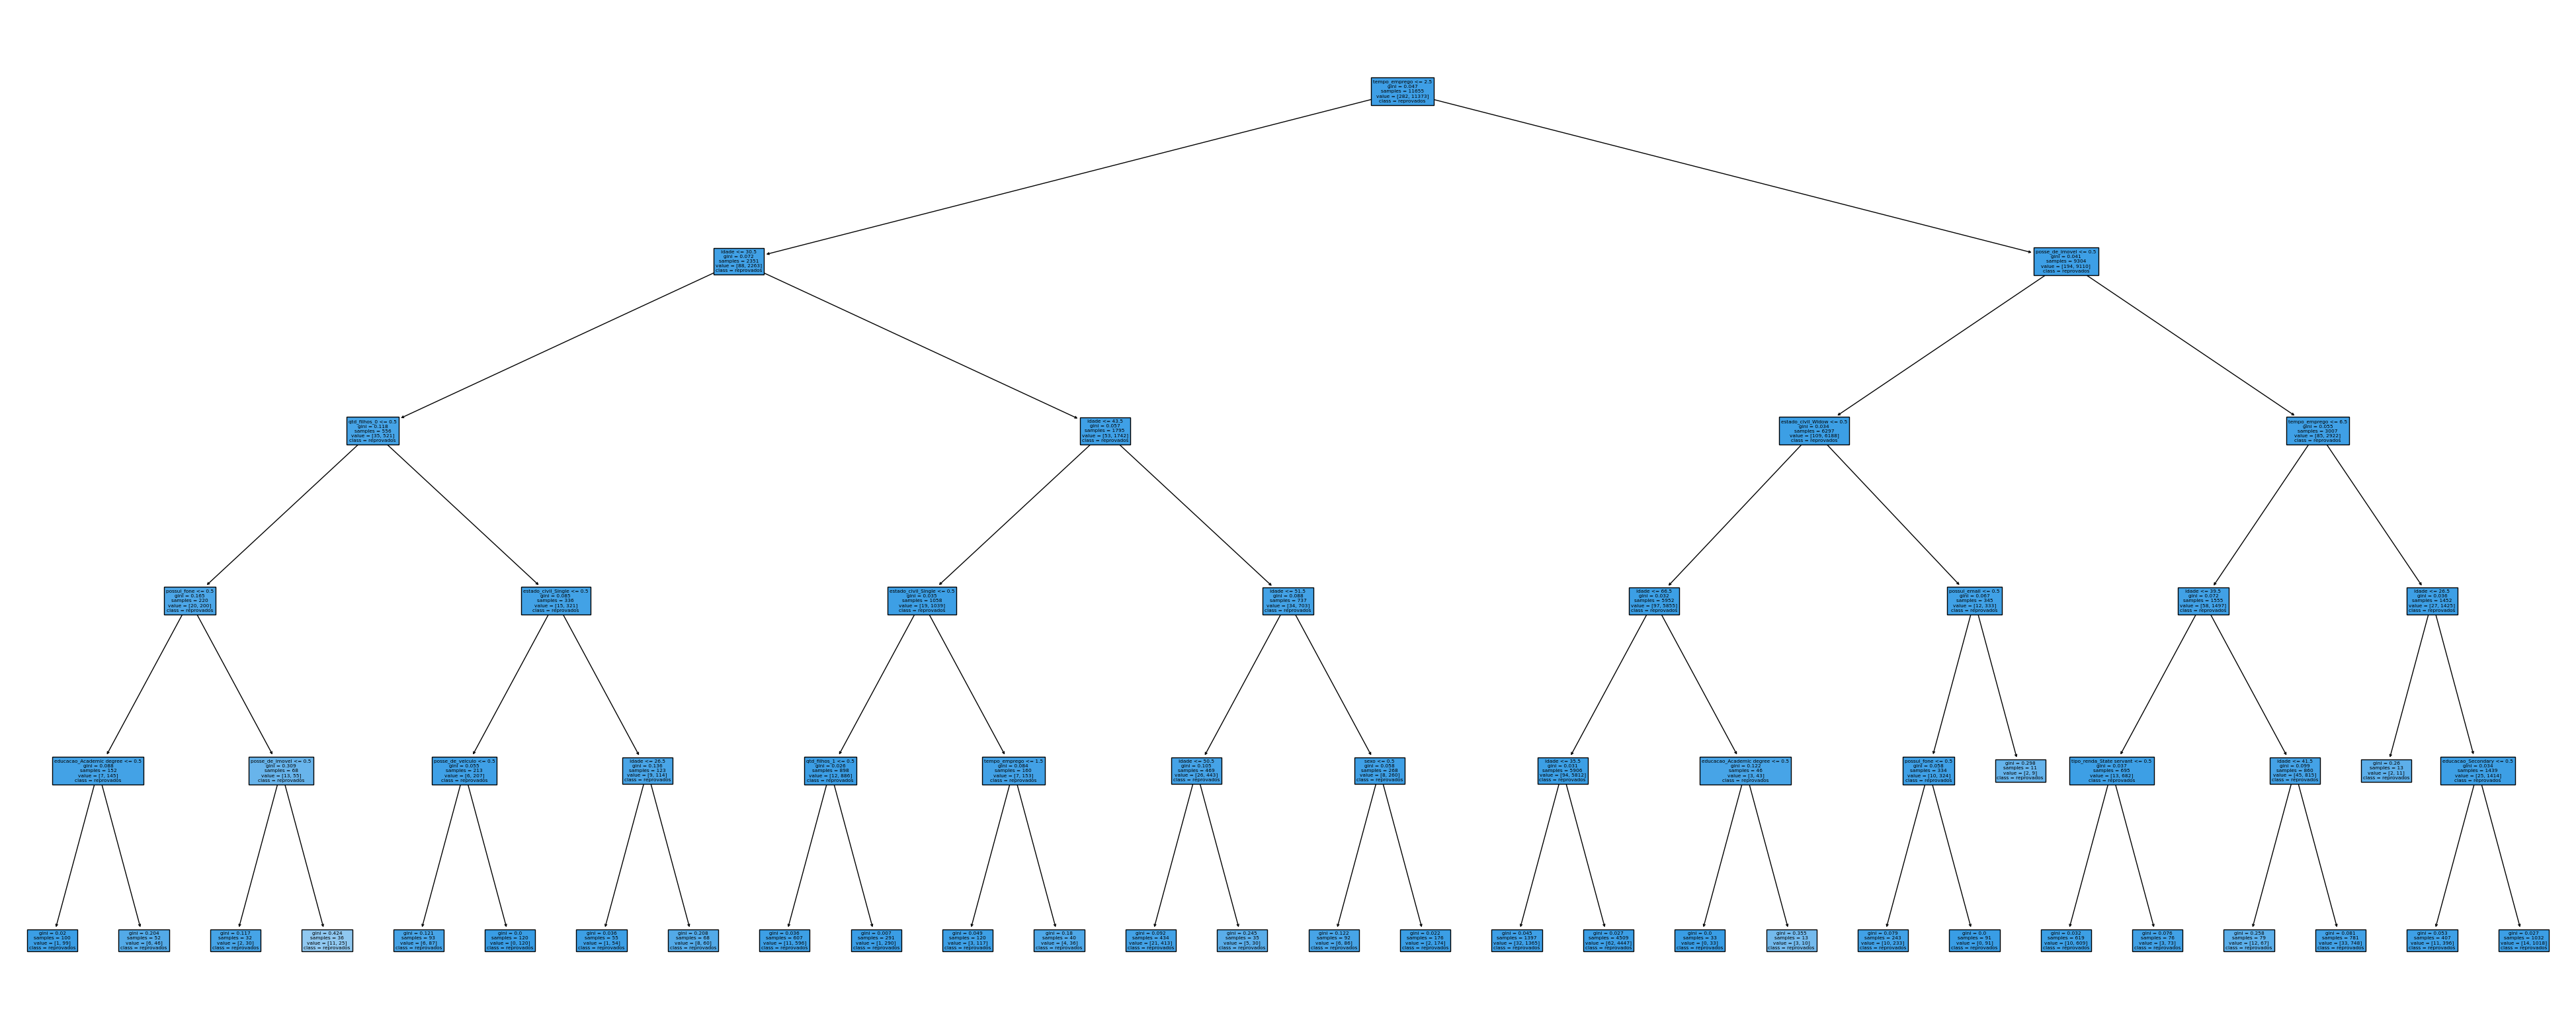

In [19]:
plt.figure(figsize=(50,20))
plot_tree(clf_pruning,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X_train.columns);
plt.show()

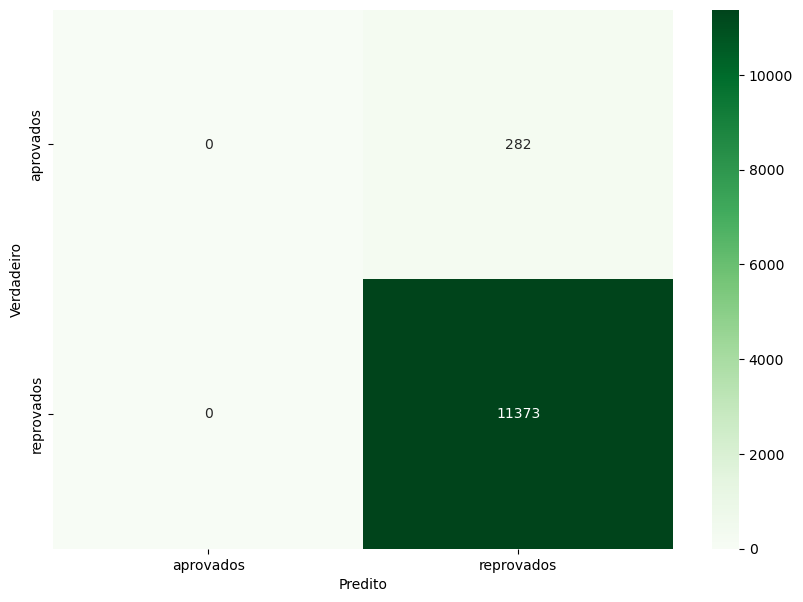

In [20]:
y_train_pred = clf_pruning.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [21]:
y_pred = clf_pruning.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.98


A classificação foi regredindo e dando prioridade as raizes mais relevantes ou as que tem mais numero de Maus, a base esta em Overfiting para o individuo mau pagador e foi inviezada, dando uma acuracia de 98%. O numero de maus pagadores é maior quanto mais corto a raizes mais enviezado o modelo, para esse caso que um numero é bem maior que o outro. 